In [1]:
import math
import random
import numpy as np
import import_ipynb
import matplotlib.pyplot as plt

from draw import draw_dot
from engine import Value

importing Jupyter notebook from draw.ipynb
importing Jupyter notebook from engine.ipynb


### Neuron visual representation in Convolutional Neural Network
![Neuron](neuron.jpeg)

### Simple neuron code example

In [2]:
# inputs x1, x2
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')
# weights w1, w2
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')
# bias b (value for convenient manual gradient calculation)
b = Value(6.8813735870195432, label = 'b')

# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1 * w1'
x2w2 = x2*w2; x2w2.label = 'x2 * w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1 + x2w2'
activation = x1w1x2w2 + b; activation.label = 'activation'
output = activation.tanh(); output.label = 'output'

# automatic backprogation
output.backward()

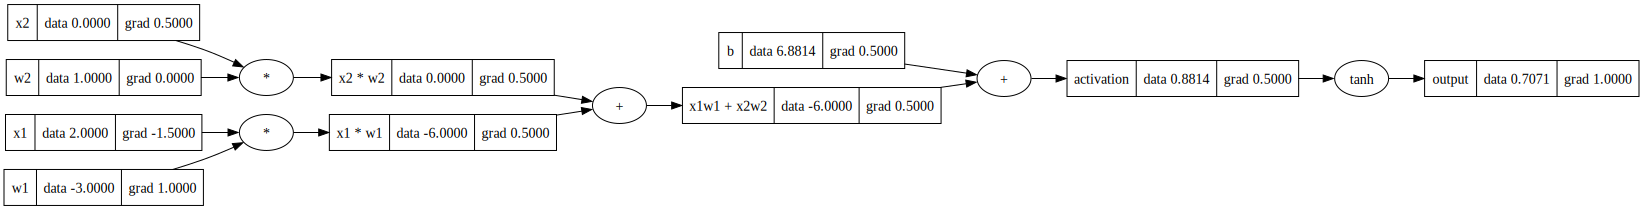

In [3]:
draw_dot(output)

### Simple Neural Network visual representation with corresponding code example
![Neural_network](neural_network.jpeg)

### Neural Network implementation

In [4]:
class Neuron:
    
    def __init__(self, numberOfInputs):
        self.w = [Value(random.uniform(-1, 1)) for _ in range(numberOfInputs)]
        self.b = Value(random.uniform(-1, 1))
        
    # forward pass for single neuron
    def __call__(self, x):
        # activation = sum(wi * xi) + b
        activation = sum(wi * xi for wi, xi in zip(self.w, x)) + self.b
        output = activation.tanh()
        return output
    
    def parameters(self):
        return self.w + [self.b]

In [5]:
# single neuron instance with random weights and bias
x = [2.0, 3.0]
neuron = Neuron(len(x))
neuron(x)

Value(data=-0.9826579760151293)

In [6]:
# layer of neurons is just a list of neurons equal to numberOfOutputs, where numberOfInputs means how many inputs each neuron in layer has
class Layer:
    
    def __init__(self, numberOfInputs, numberOfOutputs):
        self.neurons = [Neuron(numberOfInputs) for _ in range(numberOfOutputs)]
        
    # forward pass for layer, takes list of inputs and returns list of outputs
    def __call__(self, inputs):
        outputs = [neuron(inputs) for neuron in self.neurons]
        return outputs[0] if len(outputs) == 1 else outputs
    
    def parameters(self):
        params = []
        for neuron in self.neurons:
            params += neuron.parameters()
        return params

In [7]:
# single layer of 4 neurons where each neuron has 3 inputs equal to x
x = [2.0, 3.0, 4.0]
layer = Layer(len(x), 4)
layer(x)

[Value(data=0.9993077157521024),
 Value(data=0.9991226175849671),
 Value(data=0.9998926613271418),
 Value(data=0.9999809078171394)]

In [8]:
class MultiLayerPerceptron:
    
    def __init__(self, numberOfInputs, layerSizes):
        # create layerSizes list from value inputLayerSize and concatenate it with hiddenLayerSizes
        layerSizes = [numberOfInputs] + layerSizes
        self.layers = [Layer(layerSizes[i], layerSizes[i+1]) for i in range(len(layerSizes)-1)]
        
    def __call__(self, inputs):
        # call each layer with inputs and set outputs as new inputs for next layer
        for layer in self.layers:
            outputs = layer(inputs)
            inputs = outputs
        return outputs
    
    def parameters(self):
        params = []
        for layer in self.layers:
            params += layer.parameters()
        return params

In [9]:
inputs = [2.0, 3.0, 4.0]
mlp = MultiLayerPerceptron(len(inputs), [4, 4, 1])
mlp(inputs)

Value(data=-0.9023609044599542)

### Neural Network training example

In [10]:
inputDataSet = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0],
]
desiredOutputs = [1.0, -1.0, -1.0, 1.0]

### Loss - single number that measures how well neural netowrk is performing, lower is better.

### Loss = sum((output of neural network - desired output)**2)

In [11]:
# calculate outputs for each input in inputDataSet before training
predictedOutputs = [mlp(inputs) for inputs in inputDataSet]
predictedOutputs

[Value(data=0.22619936115676745),
 Value(data=-0.7577463579399697),
 Value(data=-0.7797296273110049),
 Value(data=-0.28591211207018175)]

In [12]:
# calculate loss
loss = sum((predicted - desired)**2 for desired, predicted in zip(desiredOutputs, predictedOutputs))
loss

Value(data=2.3595432528188884)

In [20]:
# parameters - this is small neural network with only 41 parameters which include all weights and biases
len(mlp.parameters())

41

### Training by doing gradient descent. 
Our goal is to adjust weights and biases to minimize loss function.

forward pass -> calculate loss -> backpropagation -> adjust weights and biases -> repeat

In [13]:
step = 0.01
trainingIterations = 1000
    
for iteration in range(trainingIterations):
    # forward pass
    predictedOutputs = [mlp(inputs) for inputs in inputDataSet]

    # calculate loss with mean squared error
    loss = sum((predicted - desired)**2 for desired, predicted in zip(desiredOutputs, predictedOutputs))

    # zero all gradients
    for param in mlp.parameters():
        param.gradient = 0.0
        
    # backpropagation calculates all gradients in network
    loss.backward()

    # stochastic gradient descent - adjust weights and biases in network to minimize loss function
    for param in mlp.parameters():
        param.data += param.gradient * -step # minus because we want to go in opposite direction of gradient
        
    print(f'Iteration: {iteration}, Loss: {loss.data}')

Iteration: 0, Loss: 2.3595432528188884
Iteration: 1, Loss: 1.3282424301733111
Iteration: 2, Loss: 0.8974688124184611
Iteration: 3, Loss: 0.7049644302508686
Iteration: 4, Loss: 0.5980238592407905
Iteration: 5, Loss: 0.5271309532143471
Iteration: 6, Loss: 0.47439331340933233
Iteration: 7, Loss: 0.43231638098563674
Iteration: 8, Loss: 0.3973013330863205
Iteration: 9, Loss: 0.3673933207199256
Iteration: 10, Loss: 0.3414090620334206
Iteration: 11, Loss: 0.3185648508463267
Iteration: 12, Loss: 0.2983037902357084
Iteration: 13, Loss: 0.2802088680239651
Iteration: 14, Loss: 0.26395573571631015
Iteration: 15, Loss: 0.24928511699512454
Iteration: 16, Loss: 0.23598556890535888
Iteration: 17, Loss: 0.2238820577387201
Iteration: 18, Loss: 0.21282800363052684
Iteration: 19, Loss: 0.20269951326642272
Iteration: 20, Loss: 0.19339106340288997
Iteration: 21, Loss: 0.1848121884384126
Iteration: 22, Loss: 0.17688488810819836
Iteration: 23, Loss: 0.16954156694087485
Iteration: 24, Loss: 0.16272337573625084

In [14]:
# predicted outputs after training
predictedOutputs

[Value(data=0.9826680041072992),
 Value(data=-0.9806385134889171),
 Value(data=-0.9704972316154413),
 Value(data=0.9653103871808034)]